In [1]:
# Import Libraries

# !jupyter nbextension enable --py widgetsnbextension

import os 
import cv2
from datetime import date
import json
import itertools

import rasterio
import matplotlib.pyplot as plt
import numpy as np
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from sentinelhub import pixel_to_utm, utm_to_pixel

import utm
import pandas as pd


from decouple import config

<Axes: >

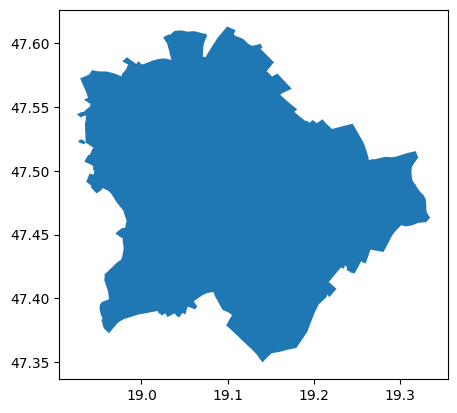

In [2]:

import osmnx as ox # version: 1.0.1
import matplotlib.pyplot as plt # version: 3.7.1

city = 'Budapest'
admin = ox.geocode_to_gdf(city)
admin.plot()


# Step 1. Collect the Sentinel-2B data

In [3]:
username = config('USERNAME')
password = config('PASSWORD')


# Set up Sentinel API
api = SentinelAPI(username, password, 'https://scihub.copernicus.eu/dhus')

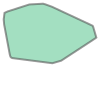

In [4]:
# Set up Geo json
geoJson_path = '../data/geojson/Malta_Sicily.json'
footprint = geojson_to_wkt(read_geojson(geoJson_path))

len(footprint)
# to simplify the query, I extract the convex hull of the input polygon
admin_polygon = admin.convex_hull.geometry.to_list()[0]
admin_polygon

In [5]:
# Query Sentinel API
products = api.query(admin_polygon,
                     date=('20220623', '20231006'),
                     platformname='Sentinel-2',
                     cloudcoverpercentage=(0, 100))
                 


ServerError: HTTP status 200 OK: 
The Sentinels Scientific Data Hub

# Copernicus Sentinel Data is now available on the Copernicus Data Space
Ecosystem

[https://dataspace.copernicus.eu](https://dataspace.copernicus.eu/)

In [ ]:
# download all results from the search
api.download_all(products)

# convert to Pandas DataFrame
products_df = api.to_dataframe(products)